# EE559 Homework 1 - Ishaan Vasant (6989506537)

## 1. Banknote authentication Dataset

### Data were extracted from images that were taken from genuine and forged banknote- like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.


### (a) Download the Skin Segmentation data from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication#.


In [34]:
import pandas as pd
#Import Library Pandas


In [103]:
df= pd.read_csv("bank_note_data.csv")
#Reading CSV file

In [105]:
#Dropping and seperating the last column
X= df.drop('Class', axis=1)
Y= df.Class
print(X, Y)

      Image.Var  Image.Skew  Image.Curt   Entropy
0      3.621600     8.66610   -2.807300 -0.446990
1      4.545900     8.16740   -2.458600 -1.462100
2      3.866000    -2.63830    1.924200  0.106450
3      3.456600     9.52280   -4.011200 -3.594400
4      0.329240    -4.45520    4.571800 -0.988800
5      4.368400     9.67180   -3.960600 -3.162500
6      3.591200     3.01290    0.728880  0.564210
7      2.092200    -6.81000    8.463600 -0.602160
8      3.203200     5.75880   -0.753450 -0.612510
9      1.535600     9.17720   -2.271800 -0.735350
10     1.224700     8.77790   -2.213500 -0.806470
11     3.989900    -2.70660    2.394600  0.862910
12     1.899300     7.66250    0.153940 -3.110800
13    -1.576800    10.84300    2.546200 -2.936200
14     3.404000     8.72610   -2.991500 -0.572420
15     4.676500    -3.38950    3.489600  1.477100
16     2.671900     3.06460    0.371580  0.586190
17     0.803550     2.84730    4.343900  0.601700
18     1.447900    -4.87940    8.342800 -2.108600


### (b) Pre-Processing and Exploratory data analysis:
### i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

<function matplotlib.pyplot.show(*args, **kw)>

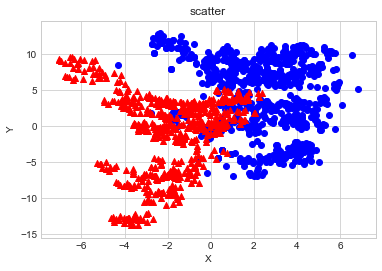

In [290]:
#Individual scatterplot of Image.Var vs Image.Skew, with color coded Class

import matplotlib.pyplot as plt
fig=plt.figure()
ax1 = fig.add_subplot(1,1,1)
for i in range(0,1371):
    if df.iloc[i,4]==0:
        ax1.scatter(df.iloc[i,0],df.iloc[i,1], color='blue', marker='o')
    if df.iloc[i,4]==1:
        ax1.scatter(df.iloc[i,0],df.iloc[i,1], color='red', marker='^')

plt.title('scatter')
plt.xlabel('X')
plt.ylabel('Y')
plt.show


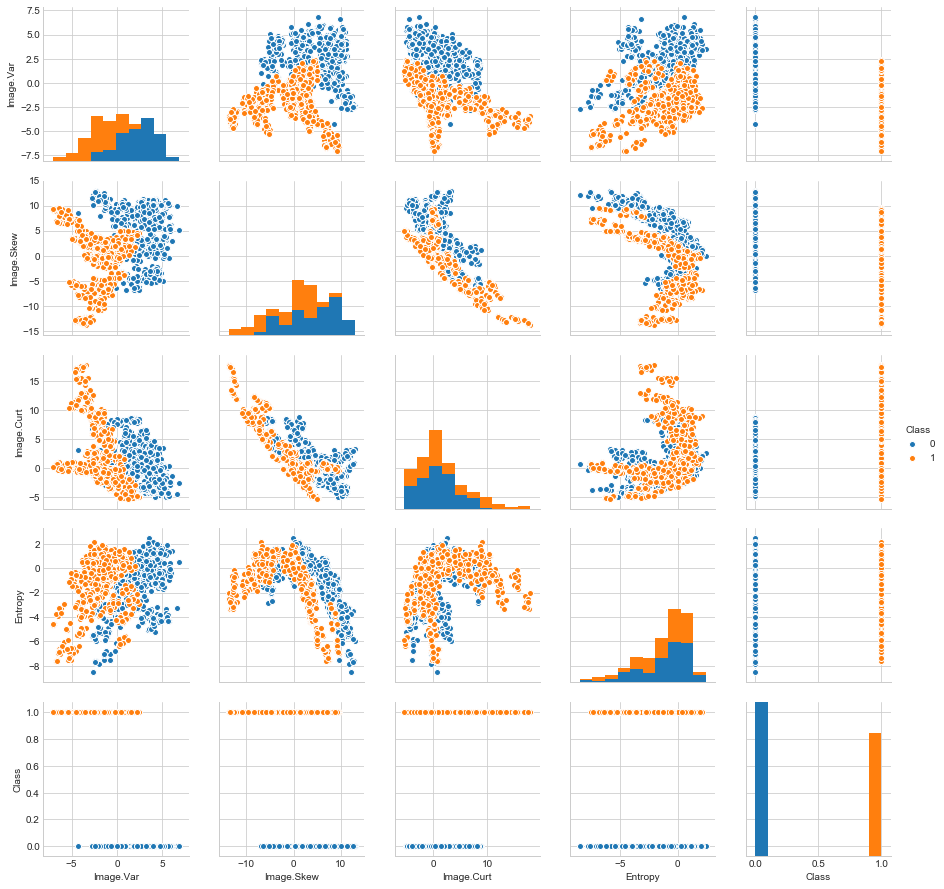

In [291]:
#Pairwaise Scatterplot Matrix of all inputs

import seaborn as sb
sb.pairplot(data=df,hue='Class')

### ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

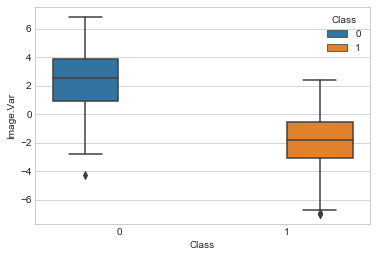

In [156]:
#Boxplots
import seaborn as sb
sb.boxplot(x="Class", y="Image.Var", hue="Class", data=df)

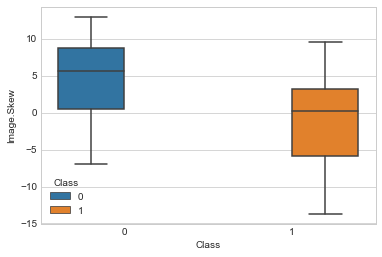

In [157]:
import seaborn as sb
sb.boxplot(x="Class", y="Image.Skew", hue="Class", data=df)

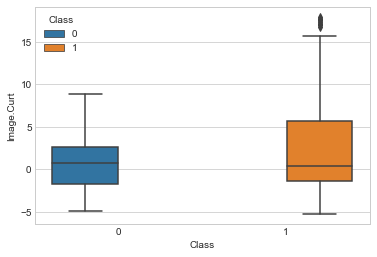

In [158]:
import seaborn as sb
sb.boxplot(x="Class", y="Image.Curt", hue="Class", data=df)

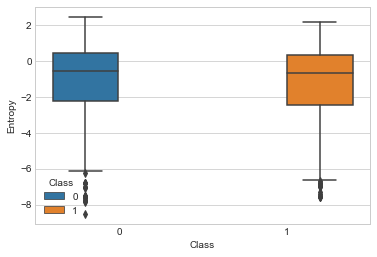

In [159]:
import seaborn as sb
sb.boxplot(x="Class", y="Entropy", hue="Class", data=df)

### iii. Select the first 200 rows of Class 0 and the first 200 rows of Class 1 as the test set and the rest of the data as the training set.

In [150]:
Class_0=df[df['Class']==0]
Class_1=df[df['Class']==1]

X_Class_0=Class_0.drop('Class', axis=1)
Y_Class_0=Class_0.Class
X_Class_1=Class_1.drop('Class', axis=1)
Y_Class_1=Class_1.Class

XClass0_200=X_Class_0.head(n=200)
XClass1_200=X_Class_1.head(n=200)
YClass0_200=Y_Class_0.head(n=200)
YClass1_200=Y_Class_1.head(n=200)

frames=[XClass0_200,XClass1_200]
frames1=[YClass0_200,YClass1_200]

XTest=pd.concat(frames)
YTest=pd.concat(frames1)

XClass0_rest=X_Class_0.tail(n=len(X_Class_0)-200)
XClass1_rest=X_Class_1.tail(n=len(X_Class_1)-200)
YClass0_rest=Y_Class_0.tail(n=len(Y_Class_0)-200)
YClass1_rest=Y_Class_1.tail(n=len(Y_Class_1)-200)

frames2=[XClass0_rest,XClass1_rest]
frames3=[YClass0_rest,YClass1_rest]

XTrain=pd.concat(frames2)
YTrain=pd.concat(frames3)



### (c) Classification using KNN on Banknote authentication Dataset
### i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [166]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(XTrain, YTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [175]:
YPredict=neigh.predict(XTest)
print(neigh.predict(XTest))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [176]:
from sklearn.metrics import accuracy_score
accuracy_score(YTest,YPredict)

1.0

### ii. Test all the data in the test database with k nearest neighbors. Take de- cisions by majority polling. Plot train and test errors in terms of 1/k for k ∈ {1, 4, 7, . . . , 901}. You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F-score when k = k∗.

Minimum Error Rate =  0.0
K value is  1


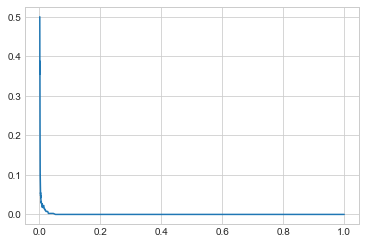

In [193]:
import matplotlib.pyplot as plt
Min_Error_Rate=1
kinv= []
test_error = []
for k in range(1,901,3):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(XTrain, YTrain)
    YPredict=neigh.predict(XTest)
    Acc_Score=accuracy_score(YTest,YPredict)
    Error_Rate=1-Acc_Score
    test_error.append(Error_Rate)
    if(Error_Rate<Min_Error_Rate):
        Min_Error_Rate=Error_Rate
        k1=k
    kinv.append(1/k)
    
        
print("Minimum Error Rate = ",Min_Error_Rate)
print("K value is ",k1)
    

plt.plot(kinv,test_error)
plt.show()

Minimum Error Rate =  0.0
K value is  1


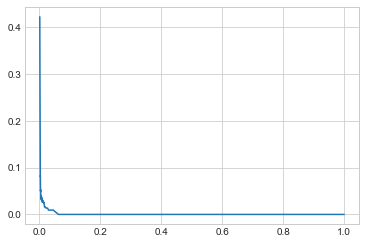

In [194]:
import matplotlib.pyplot as plt
Min_Error_Rate=1
kinv= []
test_error = []
for k in range(1,901,3):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(XTrain, YTrain)
    YPredict=neigh.predict(XTrain)
    Acc_Score=accuracy_score(YTrain,YPredict)
    Error_Rate=1-Acc_Score
    test_error.append(Error_Rate)
    if(Error_Rate<Min_Error_Rate):
        Min_Error_Rate=Error_Rate
        k1=k
    kinv.append(1/k)
    
        
print("Minimum Error Rate = ",Min_Error_Rate)
print("K value is ",k1)
    

plt.plot(kinv,test_error)
plt.show()

In [202]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(XTrain, YTrain)
YPredict=neigh.predict(XTest)
confusion_matrix(YTest, YPredict)

array([[200,   0],
       [  0, 200]])

In [219]:
(TP, FP, FN, TN)=confusion_matrix(YTest, YPredict).ravel()

In [220]:
print("TP is ",TP)
print("FP is ",FP)
print("FN is ",FN)
print("TN is ",TN)


TP is  200
FP is  0
FN is  0
TN is  200


In [221]:
TPR=TP/(TP+FN)
TNR=TN/(TN+FP)
print("TPR is ",TPR)
print("TNR is ",TNR)

TPR is  1.0
TNR is  1.0


In [226]:
Precision=TP/(TP+FP)
print("Precision is ",Precision)

Precision is  1.0


In [227]:
Recall=TN/(TN+FN)
print("Recall is ",Recall)

Recall is  1.0


In [228]:
FScore=2*((Precision*Recall)/(Precision+Recall))

print("Fscore is ",FScore)

Fscore is  1.0


### iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {50, 100, 150, . . . , 900}.1 Note: for each N , select your training set by choosing the first N/2 rows of Class 0 and the first N/2 rows of Class 1 in the training set you creatd in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 40. For example, if N = 250, the optimal k is selected from {1, 41, 81, . . . , 241}. This plot is called a Learning Curve.

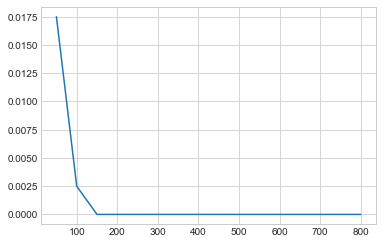

[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]
[0.01749999999999996, 0.0024999999999999467, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [292]:
import matplotlib.pyplot as plt
Min_Error_RateN=1

test_errorN = []
Nlist=[]
Min_Error_Rate_List=[]

for N in range(50,801,50):
    XClass0_N=X_Class_0.head(n=200)
    XClass1_N=X_Class_1.head(n=200)
    YClass0_N=Y_Class_0.head(n=200)
    YClass1_N=Y_Class_1.head(n=200)

    framesN=[XClass0_N,XClass1_N]
    frames1N=[YClass0_N,YClass1_N]

    XTestN=pd.concat(framesN)
    YTestN=pd.concat(frames1N)

    XClass0_restN=X_Class_0.tail(n=N//2)
    XClass1_restN=X_Class_1.tail(n=N//2)
    YClass0_restN=Y_Class_0.tail(n=N//2)
    YClass1_restN=Y_Class_1.tail(n=N//2)

    frames2N=[XClass0_restN,XClass1_restN]
    frames3N=[YClass0_restN,YClass1_restN]

    XTrainN=pd.concat(frames2N)
    YTrainN=pd.concat(frames3N)
    
    Nlist.append(N)
    Min_Error_RateN=1
    for kN in range(1,N,40):
        neighN = KNeighborsClassifier(n_neighbors=kN)
        neighN.fit(XTrainN, YTrainN)
        YPredictN=neighN.predict(XTestN)
        Acc_ScoreN=accuracy_score(YTestN,YPredictN)
        Error_RateN=1-Acc_ScoreN
  
        if(Error_RateN<Min_Error_RateN):
            Min_Error_RateN=Error_RateN

    Min_Error_Rate_List.append(Min_Error_RateN)      

plt.plot(Nlist,Min_Error_Rate_List)
plt.show()
print(Nlist)
print(Min_Error_Rate_List)

### (d) Replace the Euclidean metric with the following metrics2 and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when k ∈ {1,11,21,...,901}.
### i. Minkowski Distance:
### A. which becomes Manhattan Distance with p = 1.


In [294]:
import matplotlib.pyplot as plt
Min_Error_Rate_dia=1

for k in range(1,901,10):
    neigh_dia = KNeighborsClassifier(n_neighbors=k,p=1)
    neigh_dia.fit(XTrain, YTrain)
    YPredict=neigh_dia.predict(XTest)
    Acc_Score_dia=accuracy_score(YTest,YPredict)
    Error_Rate_dia=1-Acc_Score_dia
    if(Error_Rate_dia<Min_Error_Rate_dia):
        Min_Error_Rate_dia=Error_Rate_dia
        k1_dia=k
    
    
        
print("Minimum Error Rate = ",Min_Error_Rate_dia)
print("K value is ",k1_dia)


Minimum Error Rate =  0.0
K value is  1


### B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [295]:
import numpy as np
def logDist(x_dib,y_dib,**io_dib):
    p=io_dib["t"]
    return np.sum(abs(np.subtract(x_dib,y_dib))**p)**(1/p)

Min_Error_Rate_dib=1
for p in np.arange(0.1,1.1,0.1):
    neigh_dib = KNeighborsClassifier(n_neighbors=1,metric=logDist,metric_params={'t':10**p})
    neigh_dib.fit(XTrain, YTrain)
    YPredict=neigh_dib.predict(XTest)
    Acc_Score_dib=accuracy_score(YTest,YPredict)
    Error_Rate_dib=1-Acc_Score_dib
    if(Error_Rate_dib<Min_Error_Rate_dib):
        Min_Error_Rate_dib=Error_Rate_dib
        p_dib=p
    
    
        
print("Minimum Error Rate = ",Min_Error_Rate_dib)
print("P value is ",p)



Minimum Error Rate =  0.0
P value is  1.0


### C. which becomes Chebyshev Distance with p → ∞

In [296]:
import matplotlib.pyplot as plt
Min_Error_Rate_dic=1

for k in range(1,901,10):
    neigh_dic = KNeighborsClassifier(n_neighbors=k,metric="chebyshev")
    neigh_dic.fit(XTrain, YTrain)
    YPredict=neigh_dic.predict(XTest)
    Acc_Score_dic=accuracy_score(YTest,YPredict)
    Error_Rate_dic=1-Acc_Score_dic
    if(Error_Rate_dic<Min_Error_Rate_dic):
        Min_Error_Rate_dic=Error_Rate_dic
        k1_dic=k
    
    
        
print("Minimum Error Rate = ",Min_Error_Rate_dic)
print("K value is ",k1_dic)


Minimum Error Rate =  0.0
K value is  1


### ii. Mahalanobis Distance.

In [297]:
import matplotlib.pyplot as plt
Min_Error_Rate_dii=1

for k in range(1,901,10):
    neigh_dii = KNeighborsClassifier(n_neighbors=k,metric="mahalanobis",metric_params={'V':np.cov(X.T)})
    neigh_dii.fit(XTrain, YTrain)
    YPredict=neigh_dii.predict(XTest)
    Acc_Score_dii=accuracy_score(YTest,YPredict)
    Error_Rate_dii=1-Acc_Score_dii
    if(Error_Rate_dii<Min_Error_Rate_dii):
        Min_Error_Rate_dii=Error_Rate_dii
        k1_dii=k
    
    
        
print("Minimum Error Rate = ",Min_Error_Rate_dii)
print("K value is ",k1_dii)

Minimum Error Rate =  0.0
K value is  1


### (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,11,21,...,901}.

In [298]:
#Euclidean

import matplotlib.pyplot as plt
Min_Error_Rate_ea=1

for k in range(1,901,10):
    neigh_ea = KNeighborsClassifier(n_neighbors=k,p=2,weights= "distance")
    neigh_ea.fit(XTrain, YTrain)
    YPredict=neigh_ea.predict(XTest)
    Acc_Score_ea=accuracy_score(YTest,YPredict)
    Error_Rate_ea=1-Acc_Score_ea
    if(Error_Rate_ea<Min_Error_Rate_ea):
        Min_Error_Rate_ea=Error_Rate_ea
        k1_ea=k
    
    
        
print("Minimum Error Rate = ",Min_Error_Rate_ea)
print("K value is ",k1_ea)


Minimum Error Rate =  0.0
K value is  1


In [299]:
#Manhattan

import matplotlib.pyplot as plt
Min_Error_Rate_eb=1

for k in range(1,901,10):
    neigh_eb = KNeighborsClassifier(n_neighbors=k,p=1,weights= "distance")
    neigh_eb.fit(XTrain, YTrain)
    YPredict=neigh_eb.predict(XTest)
    Acc_Score_eb=accuracy_score(YTest,YPredict)
    Error_Rate_eb=1-Acc_Score_eb
    if(Error_Rate_eb<Min_Error_Rate_eb):
        Min_Error_Rate_eb=Error_Rate_eb
        k1_eb=k
    
    
        
print("Minimum Error Rate = ",Min_Error_Rate_eb)
print("K value is ",k1_eb)

Minimum Error Rate =  0.0
K value is  1


In [300]:
#Chebychev

import matplotlib.pyplot as plt
Min_Error_Rate_ec=1

for k in range(1,901,10):
    neigh_ec = KNeighborsClassifier(n_neighbors=k,metric="chebyshev",weights= "distance")
    neigh_ec.fit(XTrain, YTrain)
    YPredict=neigh_ec.predict(XTest)
    Acc_Score_ec=accuracy_score(YTest,YPredict)
    Error_Rate_ec=1-Acc_Score_ec
    if(Error_Rate_ec<Min_Error_Rate_ec):
        Min_Error_Rate_ec=Error_Rate_ec
        k1_ec=k
    
    
        
print("Minimum Error Rate = ",Min_Error_Rate_ec)
print("K value is ",k1_ec)

Minimum Error Rate =  0.0
K value is  1


### Summary of the test errors 

In [279]:
Table_entries_weighted={'Type of Metric':['Euclidean','Chebyshev','Manhattan'],'K-Optimal':[k1_ea,k1_ec,k1_eb],'Min Error Rate':[Min_Error_Rate_ea,Min_Error_Rate_ec,Min_Error_Rate_eb]}
dftable=pd.DataFrame.from_dict(Table_entries_weighted)
print(dftable)

  Type of Metric  K-Optimal  Min Error Rate
0      Euclidean          1             0.0
1      Chebyshev          1             0.0
2      Manhattan          1             0.0


In [282]:
Table_entries_unweighted={'Type of Metric':['Mahalanobis','Chebyshev','Manhattan'],'K-Optimal':[k1_dii,k1_dic,k1_dia],'Min Error Rate':[Min_Error_Rate_dii,Min_Error_Rate_dic,Min_Error_Rate_dia]}
dftable1=pd.DataFrame.from_dict(Table_entries_unweighted)
print(dftable1)

  Type of Metric  K-Optimal  Min Error Rate
0    Mahalanobis          1             0.0
1      Chebyshev          1             0.0
2      Manhattan          1             0.0


### (f) What is the lowest training error rate you achieved in this exercise?

Lowest training error rate achieved was 0.0